In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from stats.mfdfa import dfa # custom F(s) estimation function
import scipy.optimize as spo

# setup input/output file templates
inputFile="data/team-results.csv"
outputFile="data/team-dfa-original.csv"

Let us load the team record data and obtain the record profiles for each team. The profiles will be passed to the DFA function.

In [2]:
df=pd.read_csv(inputFile)
profileDf=df.subtract(df.mean()).cumsum()

Examine a few team record profiles.

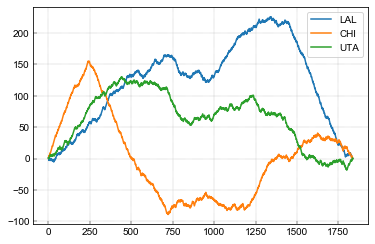

In [3]:
plt.figure()
plt.plot(profileDf["LAL"],label="LAL")
plt.plot(profileDf["CHI"],label="CHI")
plt.plot(profileDf["UTA"],label="UTA")
plt.legend(loc=0)
plt.show()

Estimate Hurst exponents for each team.

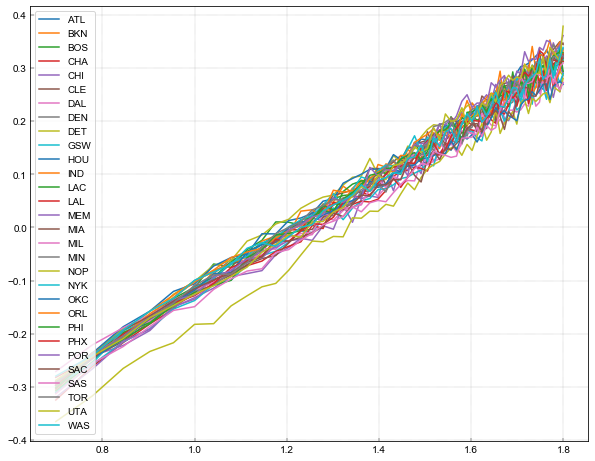

,team,H,err,corr
0,ATL,0.522290,0.005764,0.996607
1,BKN,0.548537,0.005633,0.997060
2,BOS,0.531096,0.006688,0.995589
3,CHA,0.549916,0.005875,0.996820
4,CHI,0.545568,0.007686,0.994488
5,CLE,0.560956,0.006011,0.996800
6,DAL,0.501641,0.005099,0.997120
7,DEN,0.517175,0.005966,0.996295
8,DET,0.518641,0.007316,0.994475
9,GSW,0.532304,0.006571,0.995760


In [4]:
plt.figure(figsize=(10,8))
fits=[]
# by setting qs you also set the range in which H will be estimated
qs=np.unique(np.logspace(0.7,1.8,num=150).astype(int))
# for each team
for team in df.columns:
    # obtain F_q(s) with q=2 (corresponds to the original DFA procedure)
    fqs=dfa(list(profileDf[team].values),2,qs)
    plt.plot(np.log10(qs),np.log10(fqs),label=team)
    # fit lg(F(s)) linearly
    params,cov=spo.curve_fit(lambda x,a,b: a*x+b,np.log10(qs),np.log10(fqs))
    # we use correlation coefficient for the goodness of fit
    # we have selected qs bounds to obtain the largest minimum
    # correlation coefficient in the data set
    corr=np.corrcoef(np.log10(fqs),params[0]*np.log10(qs)+params[1])[0,1]
    fits+=[[team,params[0],cov[0][0]**0.5,corr],]
plt.legend(loc=0)
plt.show()

dfaDf=pd.DataFrame(fits,columns=["team","H","err","corr"])
dfaDf

In [5]:
dfaDf.to_csv(outputFile,float_format="%.5f")